# Exploration analysis of dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data1 = pd.read_csv('Data/train/513181.csv', sep=',')
data2 = pd.read_csv('Data/train/10035828.csv', sep=',')
target = pd.read_csv('Data/train.csv', sep=',')

## Basic visualisations

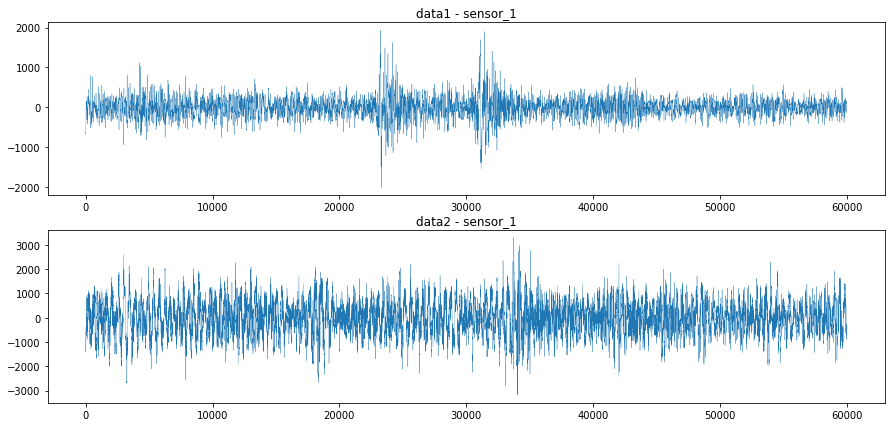

In [3]:
plt.figure(figsize=(15,7))

plt.subplot(211)
plt.plot(data1['sensor_1'], linewidth=0.3)
plt.title('data1 - sensor_1')

plt.subplot(212)
plt.plot(data2['sensor_1'], linewidth=0.3)
plt.title('data2 - sensor_1')
plt.show()

## Fourier Transform

In [4]:
len(data1)

60001

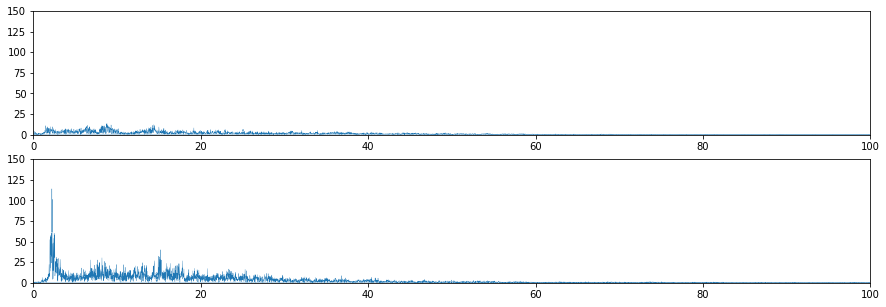

In [5]:
N = len(data1)
Te = 10**-3

sp1 = np.fft.fft(data1['sensor_3'])
sp2 = np.fft.fft(data2['sensor_1'])
freq = np.fft.fftfreq(data1['sensor_1'].shape[0])

plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(freq/10**-3, abs(sp1)/N, linewidth=0.3)
plt.xlim([0,100])
plt.ylim([0,150])

plt.subplot(212)
plt.plot(freq/10**-3, abs(sp2)/N, linewidth=0.3)
plt.xlim([0,100])
plt.ylim([0,150])
plt.show()

In [6]:
data_fft2 = data1.apply(np.fft.fft)
data_fft2 = abs(data_fft2)/len(data1)

In [7]:
data_fft2['freq'] = freq/10**-3
data_fft2

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,freq
0,1.363644,0.069682,4.534174,1.172580,0.260329,1.156781,0.199297,1.383094,0.564724,1.542924,0.000000
1,0.161253,0.055472,1.061992,3.387593,0.112842,0.903895,1.034883,0.727398,0.010232,18.392085,0.016666
2,0.148947,0.044712,0.966427,1.636110,0.183799,0.868952,0.312519,0.867414,0.147644,42.300439,0.033333
3,0.233627,0.148290,0.900640,1.585437,0.160240,0.751922,0.771164,0.070022,0.075612,14.692492,0.049999
4,0.102042,0.256387,0.589771,0.794378,0.064625,1.256760,0.314269,0.338927,0.036436,29.092097,0.066666
...,...,...,...,...,...,...,...,...,...,...,...
59996,0.328698,0.695719,0.502987,0.754822,0.097724,0.520748,0.721373,0.316579,0.148915,2.977937,-0.083332
59997,0.102042,0.256387,0.589771,0.794378,0.064625,1.256760,0.314269,0.338927,0.036436,29.092097,-0.066666
59998,0.233627,0.148290,0.900640,1.585437,0.160240,0.751922,0.771164,0.070022,0.075612,14.692492,-0.049999
59999,0.148947,0.044712,0.966427,1.636110,0.183799,0.868952,0.312519,0.867414,0.147644,42.300439,-0.033333


In [8]:
data_fft2 = data_fft2[data_fft2['freq']>=0]
data_fft2 = data_fft2[data_fft2['freq']<60]

# Visualisation de toutes les données

In [8]:
import os 

def import_and_transform_data(path, limit=100):
    filenames = os.listdir(path)[:limit] # get list of filenames in path
    df = pd.DataFrame()

    for filename in filenames:
        raw_data = pd.read_csv(path+filename, sep=',') # import data

        # Fourier transform
        N = len(raw_data)
        data = raw_data.apply(np.fft.fft)
        data = abs(data)/N
        freq = np.fft.fftfreq(N)/10**-3
        data['freq'] = freq
        data = data[(data['freq']>=0) & (data['freq']<40)]
        data.fillna(0, inplace=True)

        # Transpose data and concat with segment_id
        data = data.set_index('freq').transpose().reset_index()
        segment_id = filename.split('.')[0] # get segment_id of the data
        data['segment_id'] = segment_id # create column with segment_id
        data['segment_id'] = data['segment_id'].astype(int)
        
        # Create complete dataframe and fill NA values
        df = pd.concat([df,data], axis=0, ignore_index=True) # append data in complete dataframe
        df.fillna(0, inplace=True)

    return df

In [9]:
df = import_and_transform_data('Data/train/', 1000)


In [10]:
df = df.merge(target, on='segment_id')

In [11]:
df

,index,0.0,0.01666638889351844,0.03333277778703688,0.049999166680555325,0.06666555557407376,0.0833319444675922,0.09999833336111065,0.1166647222546291,0.13333111114814752,...,39.88266862218963,39.899335011083146,39.91600139997667,39.932667788870184,39.9493341777637,39.96600056665722,39.98266695555074,39.99933334444426,segment_id,time_to_eruption
0,sensor_1,0.382244,0.252605,0.174726,0.159955,0.324538,0.272301,0.482399,0.311442,0.443052,...,0.346520,0.283368,0.199610,0.534876,0.330662,0.155477,0.295858,0.284055,1000015382,16258654
1,sensor_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000015382,16258654
2,sensor_3,2.192213,1.382067,1.593632,2.155409,4.781326,1.526960,1.513434,9.704382,10.692555,...,1.801344,2.174264,0.572924,2.711069,1.701317,1.006530,1.939777,3.464027,1000015382,16258654
3,sensor_4,0.148031,5.972092,2.596711,1.818949,1.294834,1.682951,0.842952,0.877088,0.314563,...,2.221429,0.914447,1.996497,2.665021,0.340788,1.501183,1.359381,1.967032,1000015382,16258654
4,sensor_5,0.263129,0.094471,0.229863,0.416233,0.515597,0.327723,0.116902,0.178543,0.172546,...,0.920340,0.777736,0.280852,1.079702,0.741650,1.032278,0.770636,0.429481,1000015382,16258654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,sensor_6,5.528025,0.335153,0.541654,0.250813,0.873958,0.590311,1.658883,0.614692,1.865743,...,0.436854,0.859338,0.712679,2.580526,1.773709,0.235123,2.541580,0.747174,1436148540,9420852
9996,sensor_7,5.383327,0.745960,0.610686,1.039857,1.641592,1.877777,1.648890,1.701118,0.447536,...,0.319313,0.404526,0.935108,0.404162,0.371076,1.538931,0.804172,0.905583,1436148540,9420852
9997,sensor_8,4.814386,0.261918,0.347916,0.392491,0.721146,1.080819,0.845638,0.935260,0.863933,...,6.299167,2.644503,4.049896,1.209774,3.439927,4.228017,2.690222,2.776645,1436148540,9420852
9998,sensor_9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1436148540,9420852


## Predictions

Extra Trees avec param de base

## PCA

In [12]:
X = df.iloc[:,1:-2].values
y = df['time_to_eruption'].values

In [13]:
X.shape, y.shape

((10000, 2401), (10000,))

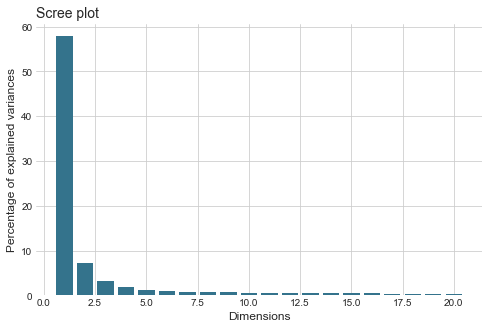

In [14]:
from sklearn import preprocessing
from sklearn import decomposition

# Centrage et réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Recherche des composantes principales
pca = decomposition.PCA(n_components=20)
pca.fit(X_scaled)

# Projection des individus sur les axes factoriels
X_projected = pca.transform(X_scaled)

# GRAPHIQUES
plt.style.use('seaborn-whitegrid')
fontsize_axes = 12
fontsize_ticks = 10
fontsize_title = 14

def display_scree_plot(pca):
    plt.figure(figsize=(8,5))
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree, color="#34738C")

    # legends
    plt.xlabel("Dimensions", fontsize=fontsize_axes)
    plt.xticks(fontsize=fontsize_ticks)
    plt.ylabel("Percentage of explained variances", fontsize=fontsize_axes)
    plt.yticks(fontsize=fontsize_ticks)
    plt.title("Scree plot", fontsize=fontsize_title, loc='left')

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    plt.show()

display_scree_plot(pca)